# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data).

In [6]:
% matplotlib inline
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('titanic.csv')

**Describe the data. **
- How big?
- What are the columns and what do they mean?

In [8]:
len(df.index)
df.columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**What’s the average age of:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

In [9]:
grp1 = df[df['Survived']==1]['Age']
grp2 = df[(df['Survived']==0) & (df['Pclass']==1)]['Age']
grp3 = df[(df['Survived']==1) & (df['Sex']=='male') & (df['Age']>30) & (df['Embarked']!='Q')]['Age']

print ('average age = %f' % (df['Age'].mean()))
print ('average age of survivor = %f' % (grp1.mean()))
print ('average age of 1st class non-survivor = %f' % (grp2.mean()))
print (df['Embarked'].unique())
print ('average age of male survivors older than 30 from anywhere but Queenstown = %f' % (grp3.mean()))

average age = 29.699118
average age of survivor = 28.343690
average age of 1st class non-survivor = 43.695312
['S' 'C' 'Q' nan]
average age of male survivors older than 30 from anywhere but Queenstown = 41.487805


**For the groups from the previous task, how far (in years) are the average ages from the median ages?**

In [10]:
print (abs(df['Age'].mean() - df['Age'].median()))
print (abs(grp1.mean() - grp1.median()))
print (abs(grp2.mean() - grp2.median()))
print (abs(grp3.mean() - grp3.median()))

1.69911764705882
0.34368965517241534
1.5546875
3.4878048780487774


**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [11]:
print ('The most common passenger class is %s with total count of %i' % \
       (df['Pclass'].value_counts().index[0],\
        df['Pclass'].value_counts().max() )) 
print ('The most common port of embarkation is %s with total count of %i' % \
       (df['Embarked'].value_counts().index[0],\
        df['Embarked'].value_counts().max() )) 
print ('The most common number of siblings or spouses aboard for survivors is %s with total count of %i' % \
       (df[df['Survived']==1]['SibSp'].value_counts().index[0],\
        df[df['Survived']==1]['SibSp'].value_counts().max() )) 

The most common passenger class is 3 with total count of 491
The most common port of embarkation is S with total count of 644
The most common number of siblings or spouses aboard for survivors is 0 with total count of 210


**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

In [12]:
rng = int(abs(df['Fare'].median()-df['Fare'].mean()) // df['Fare'].std(ddof=0))
above = (abs(df['Fare'].median()-df['Fare'].mean())== df['Fare'].median()-df['Fare'].mean())

print ('Median price is within %i-%i range of STD from the mean and it\'s %s the mean.' %\
      (rng, rng+1, ('above' if above else 'below') ))
print ('Mean   = %f\nMedian = %f\nSTD    = %f' %\
      (df['Fare'].mean(), df['Fare'].median(), df['Fare'].std(ddof=0) ))

Median price is within 0-1 range of STD from the mean and it's below the mean.
Mean   = 32.204208
Median = 14.454200
STD    = 49.665534


**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [13]:
same = (df[df['Fare'] == df['Fare'].quantile(.9)]['Pclass'].unique() == df[df['Fare'] == df['Fare'].quantile(.5)]['Pclass'].unique())
print ('90th percentile ticket is %f more expensive than 5th percentile, and they are %sthe same class.' % \
       (df['Fare'].quantile(.9) - df['Fare'].quantile(.05), '' if same else 'not ') )

90th percentile ticket is 70.733300 more expensive than 5th percentile, and they are not the same class.


**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [14]:
grp = df.groupby('Embarked')
grp_mean = grp['Fare'].mean()
print ('The highest average ticket price was paid by passengers from %s port, and it was %f' %\
       (grp_mean.loc[lambda x: x == x.max()].index[0], grp_mean.loc[lambda x: x == x.max()][0]) )

The highest average ticket price was paid by passengers from C port, and it was 59.954144


**What is the most common passenger class for each port?**

In [15]:
grp = df.groupby('Embarked')
grp_pclass = (grp['Pclass']).value_counts()

grouped_by_port = df.groupby('Embarked')
class_mode_port = pd.DataFrame()
ports = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
for port, group in grouped_by_port:
    class_mode_port[ports[port]] = pd.Series(group['Pclass'].mode())
    
class_mode_port

,Cherbourg,Queenstown,Southampton
0,1,3,3


**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [16]:
price = df['Fare'].median()*2
q_grp = df.loc[(df['Survived']==1) & (df['Sex']=='male') & (df['Pclass']==1), ['Fare']]
q_grp[q_grp['Fare'] < price].count() / q_grp.count()


Fare    0.244444
dtype: float64

**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [17]:
avg1 = df[ (df['Survived']==1) & (df['SibSp']>0)]['Age'].mean()
avg2 = df[ (df['Survived']==0) & (df['SibSp']==0)]['Age'].mean()
print (\
       'The average surviving passenger with family members was %f years %s \
than the average non-surviving passenger without them.' % \
       (abs(avg1-avg2), 'older' if abs(avg1-avg2) == (avg1-avg2) else 'younger'))

The average surviving passenger with family members was 5.686756 years younger than the average non-surviving passenger without them.


**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

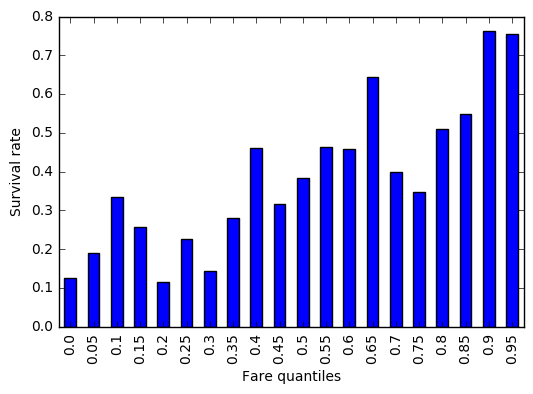

In [18]:
quantiles = pd.DataFrame({'lower': df['Fare'].quantile(np.arange(0.0, 1.0, .05))})
quantiles['upper'] = df['Fare'].quantile(np.arange( 0.05, 1.05, .05)).values

survived = []
total = []
for i in quantiles.index:
    lower = quantiles.loc[i,['lower']][0]
    upper = quantiles.loc[i,['upper']][0]
    survived.append(df[(df['Survived']==1) & (df['Fare']>lower) & (df['Fare']<=upper)]['PassengerId'].count())
    total.append(df[ (df['Fare']>lower) & (df['Fare']<=upper)]['PassengerId'].count())
    
quantiles['total'] = total
quantiles['survived'] = survived
quantiles['ratio'] = quantiles['survived']/quantiles['total']

plt = quantiles['ratio'].plot(kind='bar')
plt.set_xlabel('Fare quantiles')
plt.set_ylabel('Survival rate')


**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [19]:
print ('Age median is %f' % (df['Age'].median()))
print ('Ticket price median is %f' % (df['Fare'].median()))
print ('Siblings/spouses median is %f' % (df['SibSp'].median()))
print ('Parents/children median is %f' % (df['Parch'].median()))

Age median is 28.000000
Ticket price median is 14.454200
Siblings/spouses median is 0.000000
Parents/children median is 0.000000


**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

0.42
80.0


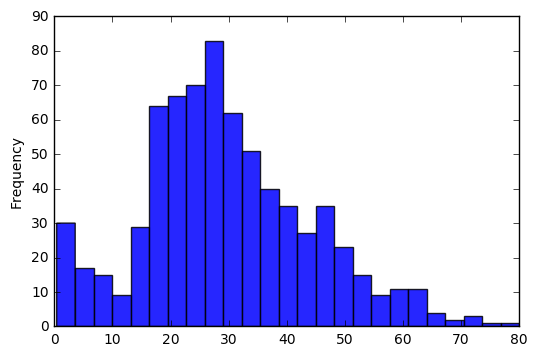

In [20]:
print (df['Age'].min())
print (df['Age'].max())
df['Age'].plot.hist(bins=25, alpha=.85)

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old
- A passenger was either younger than 20 years old or older than 50

In [21]:
total = df['PassengerId'].count()
p_survive = df['Survived'].sum()/total
p_male = (df['Sex'] == 'male').sum() / total
p_female_plus = ((df['Sex'] == 'female') & (df['SibSp']>0)).sum() / total
p_surv_c = ((df['Embarked'] == 'C') & (df['Survived']==1)).sum() / total
p_child = (df['Age'] < 10).sum() / total
p_range = pd.concat([(df['Age'] < 20) , (df['Age'] > 50)] ).sum() / total

print ('the probability that a passenger survived is %f' % (p_survive))
print ('the probability that a passenger was male is %f' % (p_male))
print ('the probability that a passenger was female and had at least one sibling or spouse on board is %f' % (p_female_plus))
print ('the probability that a survivor was from Cherbourg is %f' % (p_surv_c))
print ('the probability that a passenger was less than 10 years old is %f' % (p_child))
print ('the probability that a passenger was either younger than 20 years old or older than 50 is %f' % (p_range))

the probability that a passenger survived is 0.383838
the probability that a passenger was male is 0.647587
the probability that a passenger was female and had at least one sibling or spouse on board is 0.157127
the probability that a survivor was from Cherbourg is 0.104377
the probability that a passenger was less than 10 years old is 0.069585
the probability that a passenger was either younger than 20 years old or older than 50 is 0.255892


**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?**

In [22]:
import scipy.stats  as stats
print('If I choose 100 passengers at random from the passenger list \
the probability that exactly 42 passengers survive is %.2f%%' % (stats.binom.pmf(k=42, n=100, p=p_survive)*100))


If I choose 100 passengers at random from the passenger list the probability that exactly 42 passengers survive is 6.13%


**What’s the probability that at least 42 of those 100 passengers survive?**

In [23]:
p_42 = stats.binom.cdf(k=41, n=100, p=p_survive)
p_atleast_42 = 1-p_42
print ('The probability that at least 42 of those 100 passengers survive is %.2f%%' % (p_atleast_42*100))

The probability that at least 42 of those 100 passengers survive is 25.94%


**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**If so, at what level? If not, how do you know?**

In [31]:
male = df[((df['Sex']=='male') & (df['Survived']==1))]['Age']
male = male.dropna()
female = df[((df['Sex']=='female') & (df['Survived']==1))]['Age']
female = female.dropna()

st, pval = stats.ttest_ind(a=male, b=female, equal_var=False)
print('There is %s significant difference between the ages of male and female survivors \
\nbecause there is %.2f%% chance of having a difference between means of these two samples more than %.2f.'\
      % (('a' if pval<.05 else 'no'), pval*100, st))

queenstown = df[(df['Embarked']=='Q')]['Fare']
cherbourg = df[(df['Embarked']=='C')]['Fare']

st, pval = stats.ttest_ind(a=queenstown, b=cherbourg, equal_var=False)
print('\nThere is %s significant difference between the fares paid by \
passengers from Queenstown and the passengers from Cherbourg \
\nbecause there is %.2f%% chance of having a difference between means of these two samples more than %.2f.'\
      % (('a' if pval<.05 else 'no'), pval*100, st))


There is no significant difference between the ages of male and female survivors 
because there is 43.02% chance of having a difference between means of these two samples more than -0.79.

There is a significant difference between the fares paid by passengers from Queenstown and the passengers from Cherbourg 
because there is 0.00% chance of having a difference between means of these two samples more than -7.00.



**Accompany your p-values with histograms showing the distributions of both compared populations.**

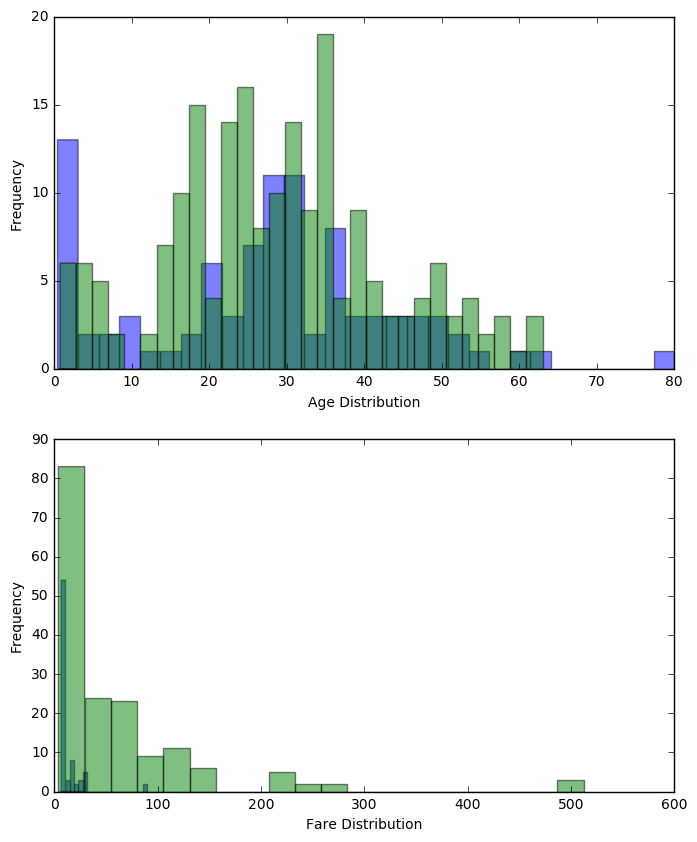

In [25]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,1,figsize=(8,10))

age_plt = male.plot.hist(bins=30, alpha=.5, color='blue', ax = axs[0])
age_plt = female.plot.hist(bins=30, alpha=.5, color='green', ax = axs[0])
age_plt.set_xlabel('Age Distribution')


fare_plt = queenstown.plot.hist(bins=20, alpha=.5, color='blue', ax = axs[1])
fare_plt = cherbourg.plot.hist(bins=20, alpha=.5, color='green', ax = axs[1])
fare_plt.set_xlabel('Fare Distribution')
 

**Did survivors pay more for their tickets than those that did not? If so, to what significance level?**


There is a significant difference between the fares paid by survivors vs non-survivors 
because there is 0.00% chance of having a difference between means of these two samples more than 6.84.
48.39540760233917 22.117886885245877
66.59699811829472 31.388206530563984


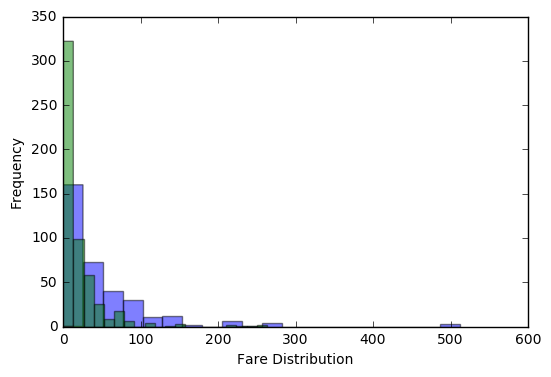

In [33]:
survivors = df[(df['Survived']==1)]['Fare']
non_survivors = df[(df['Survived']==0)]['Fare']

st, pval = stats.ttest_ind(a=survivors, b=non_survivors, equal_var=False)
print('\nThere is %s significant difference between the fares paid by survivors vs non-survivors \
\nbecause there is %.2f%% chance of having a difference between means of these two samples more than %.2f.'\
      % (('a' if pval<.05 else 'no'), pval*100, st))
print (survivors.mean(), non_survivors.mean())
print (survivors.std(), non_survivors.std())

fare_plt = survivors.plot.hist(bins=20, alpha=.5, color='blue')
fare_plt = non_survivors.plot.hist(bins=20, alpha=.5, color='green')
fare_plt.set_xlabel('Fare Distribution')

**Did a given first-class passenger have less family members on board than a given third-class passenger? If so, to what significance level?**


There is a significant difference between first-class and third-class family members 
because there is 3.79% chance of having a difference between means of these two samples more than -2.08.
0.7731481481481481 1.0081466395112015
1.0385236821638482 1.9535250260574035
count    216.000000
mean       0.773148
std        1.038524
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: Relatives, dtype: float64
count    491.000000
mean       1.008147
std        1.953525
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Relatives, dtype: float64


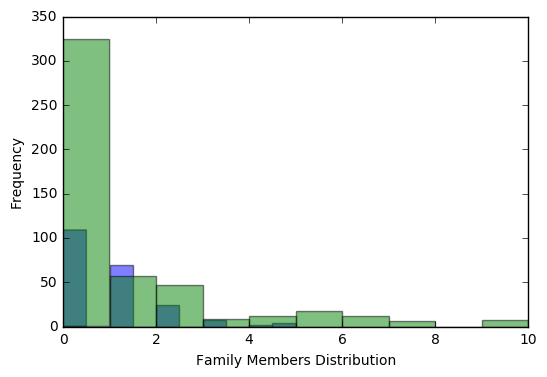

In [35]:
df['Relatives'] = df['SibSp'] + df['Parch']
first_class = df[df['Pclass']==1]['Relatives']
third_class = df[df['Pclass']==3]['Relatives']
st, pval = stats.ttest_ind(a=first_class, b=third_class, equal_var=False)
print('\nThere is %s significant difference between first-class and third-class family members \
\nbecause there is %.2f%% chance of having a difference between means of these two samples more than %.2f.'\
      % (('a' if pval<.05 else 'no'), pval*100, st))
print (first_class.mean(), third_class.mean())
print (first_class.std(),  third_class.std())
print (first_class.describe())
print (third_class.describe())
rel_plt = first_class.plot.hist(bins=10, alpha=.5, color='blue')
rel_plt = third_class.plot.hist(bins=10, alpha=.5, color='green')
rel_plt.set_xlabel('Family Members Distribution')